In [1]:
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets


In [2]:
def sigmoid(z): #hipotese
        
        res = 1 / (1 + np.exp(-z))
        return res

def custo(X,y,w): #funcao de custo
    
        parte1 = np.multiply(-y , np.log(sigmoid(np.dot(X , w))))
        parte2 = np.multiply((1 - y)  ,  np.log(1 - sigmoid(np.dot(X,w))))
        res =   np.sum(parte1 - parte2)
       
        return res/len(X)
    
def gradiente(w,X,y,alfa,n_inter):
        n = np.zeros(n_inter)
        xi = []
        for i in X:
            xi.append(i[1])
        
        for i in range(n_inter):
            w -= (alfa / len(X)) * np.sum((sigmoid(np.dot(X,w)) - y)*X,axis = 0)
        
            n[i] = custo(X,y,w)
        
        return w,n
    
def predict_probs(X, w):
        
        return sigmoid(np.dot(X, w))
    

In [3]:
class LMSTrainer(BaseEstimator):
    
    def __init__(self, analitic=False):
            
            self.analitic = analitic
            self._trained = False
            self.a = 0.
            self.b = 0.  
            self.coef_ = [0.,0.]
            self.taxa_gradiente = []
            self.n_inter = 0
    
    def fit(self, X, y=None,max_interacao = 10000,alfa = 0.00001):
        
        if self.analitic:
            
          # TODO: FAZER POR MATRIZES
            pass
        else:
           
          # TODO: FAZERPELO GRADIENTE DESCENDETE 
            teta1 = 0.
            teta0 = 0.

            gradiente = 0.
            xi = []
            for i in X:
                xi.append(i[1])
            
            for _ in range(max_interacao):
        
                
                gradiente =  np.sum((sigmoid(np.dot(X,self.coef_)) - y)*xi)
                
                teta0 -= alfa*(np.sum((sigmoid(np.dot(X,self.coef_)) - y)))
                teta1 -= alfa*gradiente
    
                
                self.taxa_gradiente.append(abs(gradiente))
                self.coef_[0] = teta0
                self.coef_[1] = teta1
                  
                '''gradiente = 0
                for xi,yi in zip(X,y):
                    derivada1 = custo(xi,yi,[teta0,teta1]) * xi[1]
                    derivada0 = custo(xi,yi,[teta0,teta1])
                    #self.taxa_gradiente.append(derivada0)
                    teta1 = teta1 - (alfa/len(y))*derivada1
                    teta0 = teta0 - (alfa/len(y))*derivada0
                    gradiente = derivada0
                '''
            
               # teta0 = 0.
               # teta1 = 0.
              #  z = np.dot(X, self.coef_)
               # h = sigmoid(z)
               # gradient = np.dot(xi, (h - y)) / y.size
               # teta0 -= alfa * gradient
               # teta1 -= alfa * gradient 
                
                self.n_inter += 1
                
            pass
    
        self._trained = True
        
        self.a = teta1
        self.b = teta0
        self.coef_[0] = teta0
        self.coef_[1] = teta1
        
        return self       

    def predict(self, X, teta, threshold=0.5):
        
        if not self._trained:
           raise RuntimeError("You must train classifer before predicting data!")
        
        
        return predict_probs(X, teta) >= threshold

In [152]:
X_train = [[1,10],[1,11],[1,12],[1,13],[1,14],[1,15],
           [1,16],[1,17],[1,18],[1,19],[1,20],[1,21],
           [1,22],[1,23],[1,24],[1,25],[1,26],[1,27],
           [1,28],[1,31],[1,34],[1,38],[1,41],[1,43],
           [1,45],[1,48],[1,50],[1,51],[1,53],[1,55]  ]
y_train = [0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0]
X_test  = X_train


iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1


trainer = LMSTrainer()
predictor = trainer.fit(X_train,y_train,100000,0.000001)


In [153]:
y_pred = predictor.predict(X_train,trainer.coef_)

xi = []
for i in (X_train):
    xi.append(i[1])  

y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [154]:
t = [[1,43]]
sigmoid(np.dot(t , trainer.coef_))

predict_probs(t,trainer.coef_)

array([0.55998632])

In [155]:
trainer.predict(t,trainer.coef_)

array([ True])

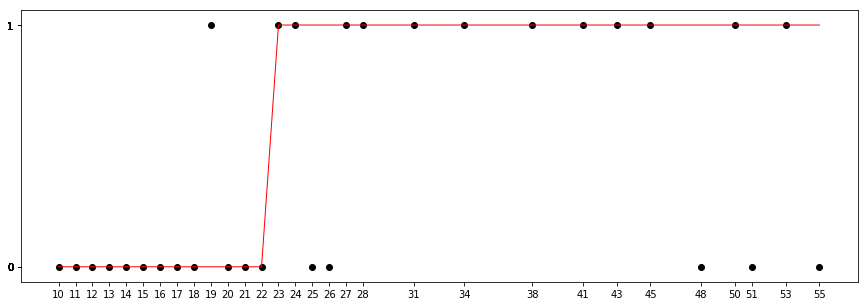

In [156]:
#print('Coefficients: \n', trainer.coef_)
plt.figure(figsize=(15,5))
plt.scatter(xi,y_train,  color='black')
plt.plot(xi, y_pred,color='red', linewidth=1)

plt.xticks((xi))
plt.yticks((y_train))

plt.show()

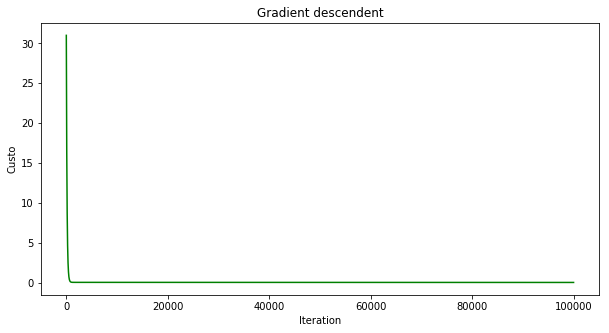

In [157]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, trainer.n_inter+1), trainer.taxa_gradiente, color='green')
plt.title("Gradient descendent")
plt.ylabel("Custo")
plt.xlabel("Iteration")
plt.show()



In [158]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

targets = ['class0' , 'class1']
print(classification_report(y_train, y_pred, target_names=targets))

              precision    recall  f1-score   support

      class0       0.92      0.71      0.80        17
      class1       0.71      0.92      0.80        13

   micro avg       0.80      0.80      0.80        30
   macro avg       0.81      0.81      0.80        30
weighted avg       0.83      0.80      0.80        30



In [159]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.00001, verbose=0, warm_start=False)
clf.fit(X_train, y_train)

#clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_train)

c:\users\renat\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [160]:
print(classification_report(y_train, y_pred, target_names=targets))

              precision    recall  f1-score   support

      class0       0.70      0.82      0.76        17
      class1       0.70      0.54      0.61        13

   micro avg       0.70      0.70      0.70        30
   macro avg       0.70      0.68      0.68        30
weighted avg       0.70      0.70      0.69        30



In [161]:
clf.predict_proba(t)

array([[0.36577133, 0.63422867]])